<a href="https://colab.research.google.com/github/Wannayli/MIDTERM/blob/main/Recommendation_Systems_%E2%80%93_Frequent_Pattern_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount the given dataset from gdrive (market-basket.csv)

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


import the market-basket dataset

In [19]:
import pandas as pd
data = pd.read_excel('/content/gdrive/My Drive/MARKET/market-basket.xlsx')
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01.12.2010 08:26,2.0,NaN,NaN
1,536365,WHITE METAL LANTERN,6.0,01.12.2010 08:26,3.0,NaN,NaN
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,01.12.2010 08:26,2.0,NaN,NaN
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01.12.2010 08:26,3.0,NaN,NaN
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,01.12.2010 08:26,3.0,NaN,NaN


Retrieve collumn from dataset

In [22]:
df1 = data[['BillNo', 'CustomerID', 'Itemname']]
df1.head()

,BillNo,CustomerID,Itemname
0,536365,NaN,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,NaN,WHITE METAL LANTERN
2,536365,NaN,CREAM CUPID HEARTS COAT HANGER
3,536365,NaN,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,NaN,RED WOOLLY HOTTIE WHITE HEART.


In [23]:
df=df1.groupby ('CustomerID') ['Itemname']. apply (lambda x: x.reset_index (drop = True)). unstack (). reset_index ()
df.drop('CustomerID',axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,POSTAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POSTAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POSTAGE,POSTAGE,POSTAGE,POSTAGE,POSTAGE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POSTAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BOTANICAL GARDENS WALL CLOCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
items = (df[0].unique())
items

array(['POSTAGE', 'BOTANICAL GARDENS WALL CLOCK', 'SCHOOL DESK AND CHAIR',
       'Manual', 'CARRIAGE', 'RED KUKUI COCONUT SEED NECKLACE',
       'VINTAGE RED KITCHEN CABINET', 'BLING KEY RING STAND',
       'LOVE SEAT ANTIQUE WHITE METAL',
       'RUSTIC  SEVENTEEN DRAWER SIDEBOARD', 'Next Day Carriage',
       'CLOTHES PEGS RETROSPOT PACK 24', 'VINTAGE WOODEN BAR STOOL',
       'RED KITCHEN SCALES', 'PAPER BUNTING RETROSPOT',
       'MINI CAKE STAND  HANGING STRAWBERY',
       'CERAMIC BOWL WITH LOVE HEART DESIGN',
       'ASSTD DESIGN 3D PAPER STICKERS', 'CLEAR ACRYLIC FACETED BANGLE',
       'REGENCY MIRROR WITH SHUTTERS',
       'SPOTTED WHITE NATURAL SEED NECKLACE', 'Bank Charges',
       'VINTAGE BLUE KITCHEN CABINET', 'REGENCY CAKESTAND 3 TIER',
       'CAKE STAND VICTORIAN FILIGREE MED', "CHILDREN'S APRON DOLLY GIRL",
       'CHEST NATURAL WOOD 20 DRAWERS', 'CHRISTMAS PUDDING TRINKET POT',
       'METAL TUBE CHIME ON BAMBOO', 'HAND OVER THE CHOCOLATE   SIGN',
       'HEART GAR

In [25]:
encoded_vals = []
def custom():
    for index, row in df.iterrows():
        labels = {}
        uncommons = list(set(items) - set(row))
        commons = list(set(items).intersection(row))
        for uc in uncommons:
            labels[uc] = 0
        for com in commons:
            labels[com] = 1
        encoded_vals.append(labels)
custom()
ohe_df = pd.DataFrame(encoded_vals)
print(ohe_df)

     METAL TUBE CHIME ON BAMBOO  CARRIAGE  \
0                             0         0   
1                             0         0   
2                             0         0   
3                             0         0   
4                             0         0   
..                          ...       ...   
619                           0         0   
620                           0         0   
621                           0         0   
622                           0         0   
623                           0         0   

     CERAMIC BOWL WITH LOVE HEART DESIGN  BROWN CHECK CAT DOORSTOP  \
0                                      0                         0   
1                                      0                         0   
2                                      0                         0   
3                                      0                         0   
4                                      0                         0   
..                                   ..

In [26]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [27]:
freq_items = apriori(ohe_df, min_support=0.006, use_colnames=True) #, verbose=1 #min_support=0.006, 
freq_items

,support,itemsets
0,0.038462,(CARRIAGE)
1,0.025641,(VINTAGE BLUE KITCHEN CABINET)
2,0.068910,(Manual)
3,0.020833,(CHEST NATURAL WOOD 20 DRAWERS)
4,0.016026,(RED KUKUI COCONUT SEED NECKLACE)
5,0.100962,(Next Day Carriage)
6,0.030449,(RUSTIC SEVENTEEN DRAWER SIDEBOARD)
7,0.008013,(SPOTTED WHITE NATURAL SEED NECKLACE)
8,0.016026,(Bank Charges)
9,0.052885,(VINTAGE RED KITCHEN CABINET)


Save the Most Frequent excel by FP-Growth result into an .xlsx files

In [28]:
freq_items.to_excel('resultFrequentItems.xlsx')

In [29]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.006)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(VINTAGE RED KITCHEN CABINET),(VINTAGE BLUE KITCHEN CABINET),0.052885,0.025641,0.017628,0.333333,13.000000,0.016272,1.461538
1,(VINTAGE BLUE KITCHEN CABINET),(VINTAGE RED KITCHEN CABINET),0.025641,0.052885,0.017628,0.687500,13.000000,0.016272,3.030769
2,(Manual),(POSTAGE),0.068910,0.485577,0.014423,0.209302,0.431038,-0.019038,0.650594
3,(POSTAGE),(Manual),0.485577,0.068910,0.014423,0.029703,0.431038,-0.019038,0.959592
4,(SPOTTED WHITE NATURAL SEED NECKLACE),(RED KUKUI COCONUT SEED NECKLACE),0.008013,0.016026,0.006410,0.800000,49.920000,0.006282,4.919872
5,(RED KUKUI COCONUT SEED NECKLACE),(SPOTTED WHITE NATURAL SEED NECKLACE),0.016026,0.008013,0.006410,0.400000,49.920000,0.006282,1.653312
6,(BROWN KUKUI COCONUT SEED NECKLACE),(RED KUKUI COCONUT SEED NECKLACE),0.009615,0.016026,0.006410,0.666667,41.600000,0.006256,2.951923
7,(RED KUKUI COCONUT SEED NECKLACE),(BROWN KUKUI COCONUT SEED NECKLACE),0.016026,0.009615,0.006410,0.400000,41.600000,0.006256,1.650641
8,(SPOTTED WHITE NATURAL SEED NECKLACE),(BROWN KUKUI COCONUT SEED NECKLACE),0.008013,0.009615,0.006410,0.800000,83.200000,0.006333,4.951923
9,(BROWN KUKUI COCONUT SEED NECKLACE),(SPOTTED WHITE NATURAL SEED NECKLACE),0.009615,0.008013,0.006410,0.666667,83.200000,0.006333,2.975962


Do the experiment with different minSupport and minConfidence values

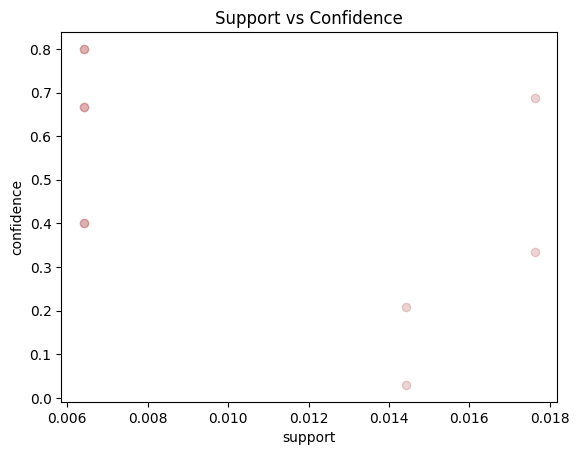

In [30]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.2,color='brown')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

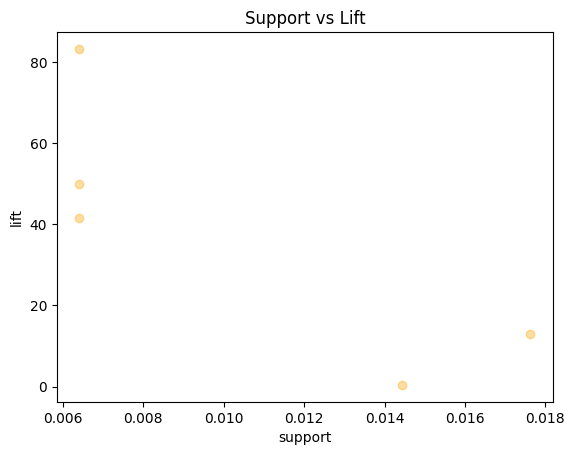

In [31]:
plt.scatter(rules['support'], rules['lift'], alpha=0.2,color='orange')
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

To install the spark first

In [32]:
%%capture
!sudo apt-get update --fix-missing

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

Start spark session

In [33]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName('fpgrowth') \
    .getOrCreate()

spark   

In [43]:
from google.colab import files
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas

sparkdata = spark.createDataFrame(data)
basketdata = sparkdata.dropDuplicates(['CustomerID', 'Itemname']).sort('CustomerID')
basketdata = basketdata.groupBy("CustomerID").agg(F.collect_list("Itemname")).sort('CustomerID')
     

/content/spark-3.0.0-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:327: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


TypeError: ignored

In [44]:
#Frequent Pattern Growth – FP Growth is a method of mining frequent itemsets
fpGrowth = FPGrowth(itemsCol="collect_list(Itemname)", minSupport=0.006, minConfidence=0.006) 
model = fpGrowth.fit(basketdata)

# Display frequent itemsets.
model.freqItemsets.show()
items = model.freqItemsets
# Display generated association rules.
model.associationRules.show()
rules = model.associationRules
# transform examines the input items against all the association rules and summarize the
# consequents as prediction
model.transform(basketdata).show()
transformed = model.transform(basketdata)
     

NameError: ignored

In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()
     

In [ ]:
rules_pdf.to_excel('rules_pdfAnteConseConfLift.xlsx')

**Conclusion**:
For larger dataset like this, FP-growth method is used for recommendation systems

the advantage of this is that it does not need to order baserd on frequency